# Exploring Early SARS-CoV2 Mutations
We are working in the directory *SARS-CoV-2*.

## Install Programs

We need two AWK scripts

In [10]:
wget 'https://github.com/awkologist/CompBiol3/raw/main/SARS-CoV-2/fasta2tbl'

--2024-02-10 10:58:47--  https://github.com/awkologist/CompBiol3/raw/main/SARS-CoV-2/fasta2tbl
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/awkologist/CompBiol3/main/SARS-CoV-2/fasta2tbl [following]
--2024-02-10 10:58:47--  https://raw.githubusercontent.com/awkologist/CompBiol3/main/SARS-CoV-2/fasta2tbl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299 [text/plain]
Saving to: ‘fasta2tbl.1’

fasta2tbl.1         100%[===================>]     299  --.-KB/s    in 0s      

2024-02-10 10:58:47 (586 KB/s) - ‘fasta2tbl.1’ saved [299/299]



In [9]:
wget 'https://github.com/awkologist/CompBiol3/raw/main/SARS-CoV-2/compare-cov2.awk'

--2024-02-10 10:44:06--  https://github.com/awkologist/CompBiol3/raw/main/SARS-CoV-2/compare-cov2.awk
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/awkologist/CompBiol3/main/SARS-CoV-2/compare-cov2.awk [following]
--2024-02-10 10:44:06--  https://raw.githubusercontent.com/awkologist/CompBiol3/main/SARS-CoV-2/compare-cov2.awk
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/plain]
Saving to: ‘compare-cov2.awk.1’

compare-cov2.awk.1  100%[===================>]   2.84K  --.-KB/s    in 0.003s  

2024-02-10 10:44:07 (855 KB/s) - ‘compare-cov2.awk.1’ saved [2904/2904]



We also need the molecular structure viewer **Jmol**

In [ ]:
sudo apt install -y jmol

## Download Virus Sequences

Download reference genome:

In [1]:
efetch -db nuccore -id NC_045512 -format fasta > wuhan-1.fasta

We create a copy in tab-delimited format:

In [13]:
./fasta2tbl wuhan-1.fasta > wuhan-1.tab

Download from [NCBI](https://www.ncbi.nlm.nih.gov/sars-cov-2/) viruses from Europe, from human hosts, without ambigious characters, complete nucleotide sequences, and a sequence length of exactly 29,903 nt. They are downloaded via the web browser as *sequences.fasta*. Move them into your current working directory.

In [1]:
cut -f 1 wuhan-1.tab

NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome


Rename the file to *cov2-len-29903.fasta*

In [2]:
mv sequences.fasta cov2-len-29903.fasta

In [3]:
grep -c ">" cov2-len-29903.fasta

3371


## Convert FASTA to TAB and Edit Header

In [9]:
head -1 sequences.fasta

>OY902096.1 |United Kingdom:England|2020-10-12


In [2]:
./fasta2tbl sequences.fasta | sed 's/|/\t/g' > cov2-len-29903.tab

In [4]:
wc -l cov2-len-29903.tab

3371 cov2-len-29903.tab


In [5]:
cut -f 1 cov2-len-29903.tab | head -2

OY902096.1 
OX648031.1 


In [6]:
cut -f 1,3 cov2-len-29903.tab | head -2

OY902096.1 	2020-10-12
OX648031.1 	2020-11-01


In [7]:
cut -f 1-3 cov2-len-29903.tab | head -2

OY902096.1 	United Kingdom:England	2020-10-12
OX648031.1 	United Kingdom:England	2020-11-01


## Analyze Data

In [10]:
cut -f 2 cov2-len-29903.tab | sed 's/:.*//' | sort | uniq -c 

     82 France
      7 Germany
      2 Greece
      1 Italy
     14 Poland
      7 Russia
      1 Serbia
      8 Spain
      1 Sweden
   3248 United Kingdom


In [11]:
egrep "Germany" cov2-len-29903.tab | cut -f 1-3

OK075090.1 	Germany: Langen	2021-01-08
MT358638.1 	Germany	2020-02
MT358639.1 	Germany	2020-02
MT358640.1 	Germany	2020-02
MT358641.1 	Germany	2020-02
MT358642.1 	Germany	2020-02
MT358643.1 	Germany	2020-02


In [18]:
awk -f compare-cov2.awk -v ref=wuhan-1.tab -v seq=cov2-len-29903.tab -v id2=MT358638

# Compared: NC_045512.2 vs MT358638.1  | 12/2019 vs 2020-02 | Wuhan vs Germany
MT358638.1  3518: G>T 
MT358638.1  12704: G>T 
MT358638.1  12797: G>A 
MT358638.1  17423: A>G 
MT358638.1  27272: T>C 
MT358638.1  28854: C>T 
# of N's: 0 of 29903
# of exchanges: 6 of 29903


In [20]:
for i in MT358638 MT358639 MT358640 MT358641 MT358642 MT358643; do awk -f compare-cov2.awk -v ref=wuhan-1.tab -v seq=cov2-len-29903.tab -v id2=$i; done

# Compared: NC_045512.2 vs MT358638.1  | 12/2019 vs 2020-02 | Wuhan vs Germany
MT358638.1  3518: G>T 
MT358638.1  12704: G>T 
MT358638.1  12797: G>A 
MT358638.1  17423: A>G 
MT358638.1  27272: T>C 
MT358638.1  28854: C>T 
# of N's: 0 of 29903
# of exchanges: 6 of 29903
# Compared: NC_045512.2 vs MT358639.1  | 12/2019 vs 2020-02 | Wuhan vs Germany
MT358639.1  241: C>T 
MT358639.1  3037: C>T 
MT358639.1  14408: C>T 
MT358639.1  23403: A>G SPIKE NT:1841 AA:614 -> D
MT358639.1  28881: G>A 
MT358639.1  28882: G>A 
MT358639.1  28883: G>C 
# of N's: 0 of 29903
# of exchanges: 7 of 29903
# Compared: NC_045512.2 vs MT358640.1  | 12/2019 vs 2020-02 | Wuhan vs Germany
MT358640.1  241: C>T 
MT358640.1  3037: C>T 
MT358640.1  6228: A>G 
MT358640.1  14408: C>T 
MT358640.1  16289: C>Y 
MT358640.1  23403: A>G SPIKE NT:1841 AA:614 -> D
MT358640.1  28881: G>A 
MT358640.1  28882: G>A 
MT358640.1  28883: G>C 
MT358640.1  28961: C>T 
MT358640.1  29870: C>M 
# of N's: 0 of 29903
# of exchanges: 11 of 29903


In [21]:
awk -f compare-cov2.awk -v ref=wuhan-1.tab -v seq=cov2-len-29903.tab -v id2=OK075090

# Compared: NC_045512.2 vs OK075090.1  | 12/2019 vs 2021-01-08 | Wuhan vs Germany: Langen
OK075090.1  241: C>T 
OK075090.1  1059: C>T 
OK075090.1  3037: C>T 
OK075090.1  5143: T>G 
OK075090.1  7843: C>T 
OK075090.1  14408: C>T 
OK075090.1  15920: T>C 
OK075090.1  21846: C>T SPIKE NT:284 AA:95 -> T
OK075090.1  22296: A>G SPIKE NT:734 AA:245 -> H
OK075090.1  23403: A>G SPIKE NT:1841 AA:614 -> D
OK075090.1  23618: A>G SPIKE NT:2056 AA:686 -> S
OK075090.1  26895: C>T 
OK075090.1  27996: G>T 
OK075090.1  28044: G>T 
OK075090.1  29769: C>T 
# of N's: 0 of 29903
# of exchanges: 15 of 29903


In [31]:
for i in $(cut -f 1 cov2-len-29903.tab | sed 's/\..*//'); do awk -f compare-cov2.awk -v ref=wuhan-1.tab -v seq=cov2-len-29903.tab -v id2=$i; done > result.txt

In [36]:
egrep -c ">" result.txt

57293


In [37]:
egrep -c "SPIKE" result.txt

9556


In [38]:
egrep -c "Motif" result.txt

161


In [40]:
egrep "Motif" result.txt | head -5

OX648044.1  22879: C>A SPIKE NT:1317 AA:440 -> N RBDomain RBMotif
OX648046.1  22992: G>A SPIKE NT:1430 AA:477 -> S RBDomain RBMotif
OX648346.1  22992: G>A SPIKE NT:1430 AA:477 -> S RBDomain RBMotif
OX648371.1  22992: G>A SPIKE NT:1430 AA:477 -> S RBDomain RBMotif
OX648814.1  22992: G>A SPIKE NT:1430 AA:477 -> S RBDomain RBMotif


In [52]:
egrep "Motif" result.txt | cut -d ' ' -f 7 | sort | uniq -c

     26 AA:440
      3 AA:441
      1 AA:445
      4 AA:452
      4 AA:453
      1 AA:454
      2 AA:464
      1 AA:471
      1 AA:473
      1 AA:475
      2 AA:476
     97 AA:477
      4 AA:478
      2 AA:482
      3 AA:483
      2 AA:484
      3 AA:490
      1 AA:491
      1 AA:501
      1 AA:502
      1 AA:503


The following command requires a file named *7DF4.script*

```
load =7DF4
spacefill off; wireframe off
cartoon
select :A; color lightgray # ACE2
select :C; color gray # Spike 2
select :D; color darkgray # Spike 3
select :B; color lightblue # Spike 1
select 319-541:B; color blue # RBDomain
select 437-508:B; color red # RBMotif
```

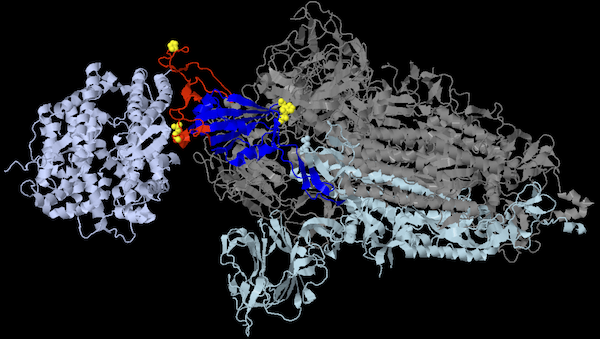

In [65]:
egrep "Motif" result.txt | awk '{print $6}' | sort | uniq -c | sed 's/:/ /' | awk '{if($1<10){print "select "$3":B; spacefill 100; color yellow"}else{print "select "$3":B; spacefill 300; color yellow"}}' | tee -a 7DF4.script

select 440:B; spacefill 300; color yellow
select 441:B; spacefill 100; color yellow
select 445:B; spacefill 100; color yellow
select 452:B; spacefill 100; color yellow
select 453:B; spacefill 100; color yellow
select 454:B; spacefill 100; color yellow
select 464:B; spacefill 100; color yellow
select 471:B; spacefill 100; color yellow
select 473:B; spacefill 100; color yellow
select 475:B; spacefill 100; color yellow
select 476:B; spacefill 100; color yellow
select 477:B; spacefill 300; color yellow
select 478:B; spacefill 100; color yellow
select 482:B; spacefill 100; color yellow
select 483:B; spacefill 100; color yellow
select 484:B; spacefill 100; color yellow
select 490:B; spacefill 100; color yellow
select 491:B; spacefill 100; color yellow
select 501:B; spacefill 100; color yellow
select 502:B; spacefill 100; color yellow
select 503:B; spacefill 100; color yellow


You can now view the structure with `mol -s 7DF4.script`

## Mapping Genomic Variance

In [7]:
minimap2 -x asm5 -a -o sequences.sam wuhan-1.fasta sequences.fasta

[M::mm_idx_gen::0.002*1.42] collected minimizers
[M::mm_idx_gen::0.008*0.58] sorted minimizers
[M::main::0.008*0.58] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.009*0.60] mid_occ = 50
[M::mm_idx_stat] kmer size: 19; skip: 19; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.009*0.61] distinct minimizers: 3006 (100.00% are singletons); average occurrences: 1.000; average spacing: 9.948; total length: 29903
[M::worker_pipeline::8.461*2.86] mapped 3371 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -x asm5 -a -o sequences.sam wuhan-1.fasta sequences.fasta
[M::main] Real time: 8.462 sec; CPU: 24.182 sec; Peak RSS: 0.100 GB


Print SAM without sequence:

In [8]:
awk -F"\t" '{ORS=""; for(i=1; i<=NF; i++){if($i!~/[ATCG]{10,}/){print $i" "}}print "\n"}' sequences.sam | head -5

@SQ SN:NC_045512.2 LN:29903 
@PG ID:minimap2 PN:minimap2 VN:2.24-r1122 CL:minimap2 -x asm5 -a -o sequences.sam wuhan-1.fasta sequences.fasta 
OY902096.1 0 NC_045512.2 1 60 29903M * 0 0 * NM:i:21 ms:i:29483 AS:i:29483 nn:i:0 tp:A:P cm:i:2969 s1:i:29635 s2:i:0 de:f:0.0007 rl:i:0 
OX648031.1 0 NC_045512.2 1 60 29903M * 0 0 * NM:i:20 ms:i:29503 AS:i:29503 nn:i:0 tp:A:P cm:i:2961 s1:i:29582 s2:i:0 de:f:0.0007 rl:i:0 
OX648036.1 0 NC_045512.2 1 60 29903M * 0 0 * NM:i:19 ms:i:29523 AS:i:29523 nn:i:0 tp:A:P cm:i:2966 s1:i:29606 s2:i:0 de:f:0.0006 rl:i:0 


Convert SAM file to binary format and sort 

In [136]:
samtools view -b sequences.sam | samtools sort - -o sequences.sorted.bam

Create index for *sequences.sorted.bam* file for visualization with IGV

In [137]:
samtools index sequences.sorted.bam

Pile-up each position and compare to the reference sequence with a depth of 4,000 reads (sets the reads per input file for each position in the alignment). The `-a` parameter adds additional annotations, here AD (Allelic Depth).

In [139]:
bcftools mpileup --max-depth 4000 -a AD -f wuhan-1.fasta -o seq-4000.bcf sequences.sorted.bam 

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 4000


Now call the significantly variant position with the multiallelic-caller (`-m`) and assume a ploidy of two. Save only variant sites (`-v`) in a VCF formated file (`-O v`).

In [143]:
bcftools call -O v -v -m --ploidy 2 -o seq-4000.vcf seq-4000.bcf

Convert original file with all variant position (without statistical model) to VCF

In [145]:
bcftools view -O v -o seq-4000-all.vcf seq-4000.bcf

Extract all positions that have at least one variant nucleotide.

In [147]:
awk '$5~/[ACGT]/||$0~/^#/{print $0}' seq-4000-all.vcf > seq-4000-snv.vcf

Download GenBank file of reference genome for annotation

In [148]:
efetch -db nuccore -id NC_045512 -format genbank > wuhan-1.gb

Edit GenBank file to be compatible with the FASTA version. 

In [149]:
sed -i 's/NC_045512/NC_045512.2/' wuhan-1.gb

Create GFF3 File *spikeprotein.gff3*:
```
##gff-version 3
##track name="Spike Protein" gffTags=on
NC_045512.2     .       CDS     21563   25383   .       +       .       ID=Spike;Name=SpikeProtein;Color=blue
NC_045512.2     .       CDS     22517   23183   .       +       .       ID=Domain;Name=RBDomain;Color=green
NC_045512.2     .       CDS     22871   23084   .       +       .       ID=Motif;Name=RBMotif;Color=red
```

Call IGV with (remove hash):

In [150]:
# igv -g wuhan-1.gb -l NC_045512.2:22871-23084 sequences.sorted.bam seq-4000.vcf seq-4000-snv.vcf spikeprotein.gff3